In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

In [2]:
import os
os.chdir(os.pardir)

In [3]:
from utils import data_load

In [7]:
df = pd.read_pickle("../data/generated/character_df.pkl")

In [8]:
df.head()

,wikipedia_movie_id,character,tconst,characters,primary_title,start_year,characters_merged
0,975900,"[Lieutenant Melanie Ballard, Desolation Willia...",tt0228333,[Desolation Williams],Ghosts of Mars,2001,"[Lieutenant Melanie Ballard, Desolation Willia..."
1,975900,"[Lieutenant Melanie Ballard, Desolation Willia...",tt0228333,[Sgt Jericho Butler],Ghosts of Mars,2001,"[Lieutenant Melanie Ballard, Desolation Willia..."
2,28463795,[],tt0094806,[Alexander 'Lex' Larsen],Brun bitter,1988,[Alexander 'Lex' Larsen]
3,28463795,[],tt0094806,[Johnny 'Jocken'],Brun bitter,1988,[Johnny 'Jocken']
4,261236,[],tt0083949,"[Chris, male prostitute]",A Woman in Flames,1983,"[Chris, male prostitute]"


In [50]:
names = df["characters_merged"].dropna().values

In [51]:
names = [item for sublist in names for item in sublist if item != "Narrator"]

In [52]:
counter = Counter(names)
common_names = counter.most_common(10)

In [53]:
common_names = [name[0] for name in common_names]

<AxesSubplot:>

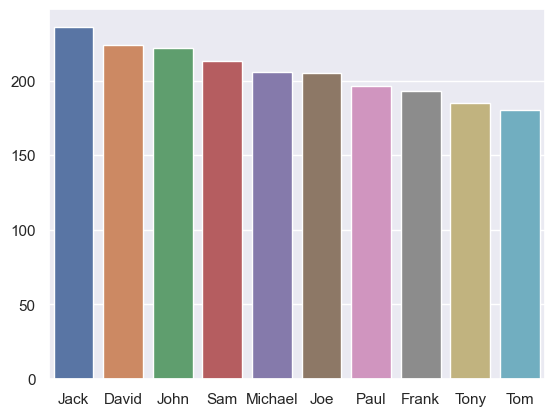

In [65]:
sns.barplot(x=[x[0] for x in counter.most_common(10)], y=[x[1] for x in counter.most_common(10)])

In [36]:
grouped_df = df.groupby("start_year")

In [74]:
for year, group in grouped_df:
    count = Counter([item for sublist in group["characters_merged"].dropna().values for item in sublist])
    common_names = count.most_common(10)
    print(f"{year}: {common_names}")

1894: [('Mr. Hamilton', 1), ('Chauncey Depew - the Director of the New York Central Railroad', 1)]
1906: [('School Master', 1), ('Joe Byrne', 1), ('Steve Hart', 1)]
1907: [('Warrigal', 1), ('Warder', 1), ('Inspector of Police', 1), ('Trooper', 1), ('Curate', 1)]
1908: [('The Wizard of Oz Man', 1), ('His Majesty the Scarecrow', 1), ('Para Bruin - the Rubber Bear', 1), ('Nick Chopper - Tin Woodman', 1), ('The White Rabbit', 1), ('Tik-Tok - the Machine Man', 1)]
1910: [('Charley Wise', 1), ('Arsène Lupin', 1), ('Sherlock Holmes', 1), ('Nulla Nulla', 1), ('Archie McPherson', 1), ('Ben Hall', 1), ('James Harrington', 1), ('Dudley Harrington', 1), ('Tom Bathurst', 1), ('Nick Harvey', 1)]
1911: [('Frankie', 1), ('Toto', 1), ("Constable O'Reilly", 1), ('Reverend Dr Lanceford', 1), ('Captain Starlight', 1), ('Andrew Larson', 1), ('Olaf Gram', 1), ('Sven Berg', 1), ('Larssons Mormon Friend', 1), ('John Hare', 1)]
1912: [('Venditius - a Roman Soldier', 1), ('Antony - a Triumvir and General', 1), 

In [62]:
johns = {
    "name": [],
    "year": [],
    "count": []
}
for year, group in grouped_df:
    for name in common_names[:3]:
        johns["name"].append(name)
        johns["year"].append(year)
        johns["count"].append(group["characters_merged"].apply(lambda x: x.count(name)).sum())


In [63]:
johns_df = pd.DataFrame(johns)

In [60]:
sns.set()

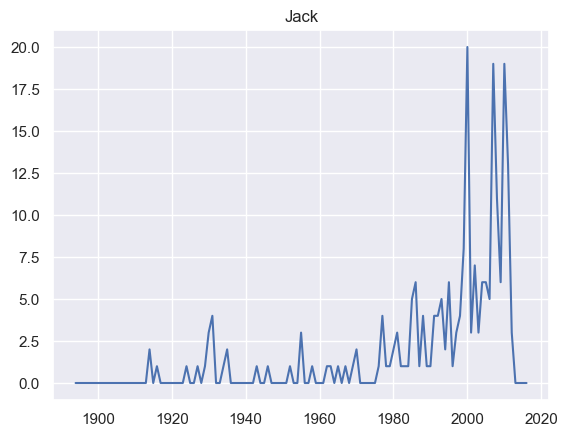

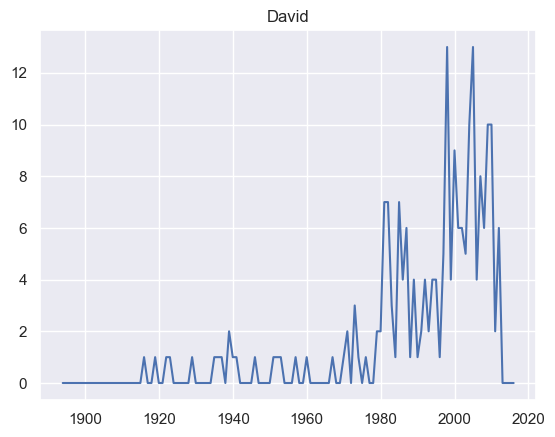

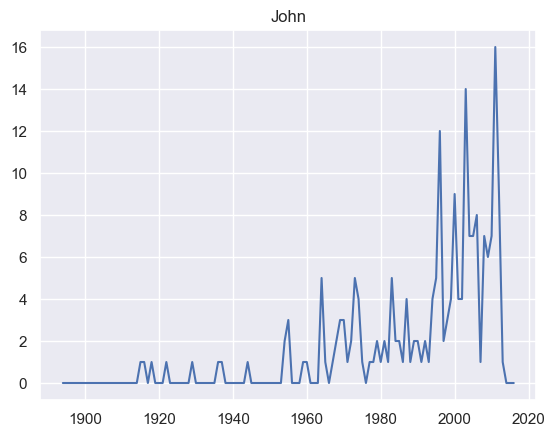

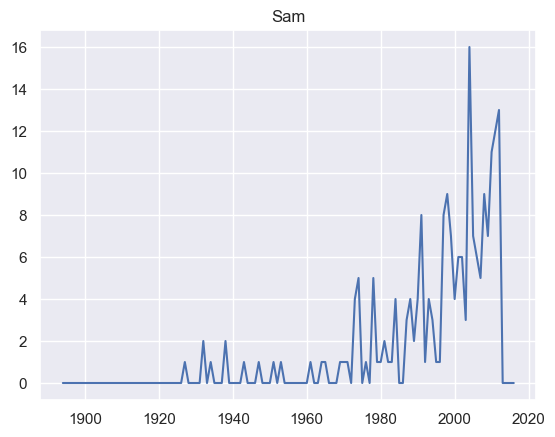

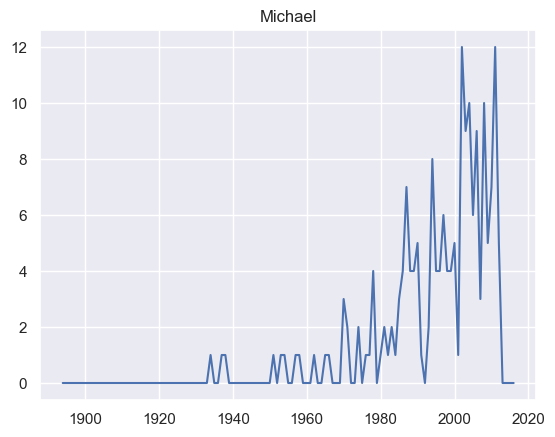

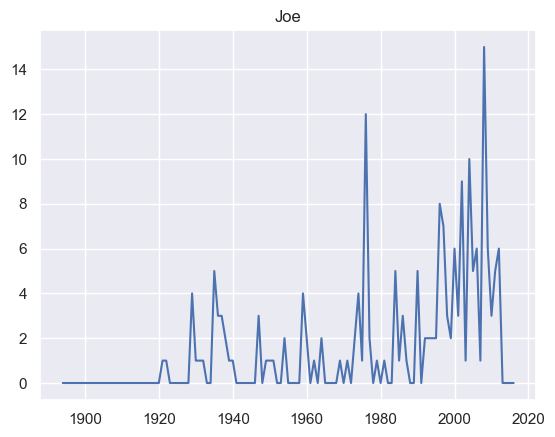

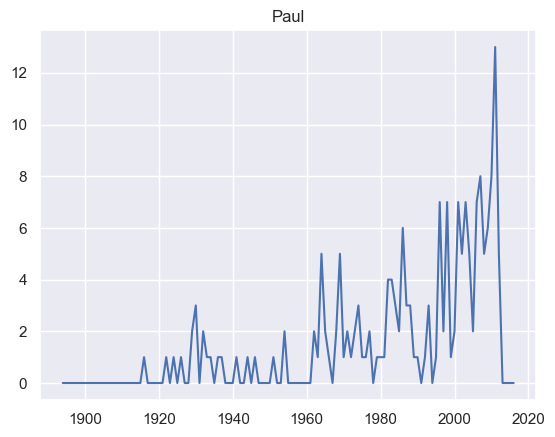

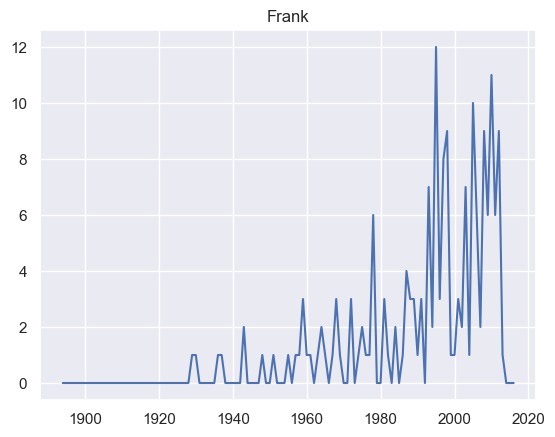

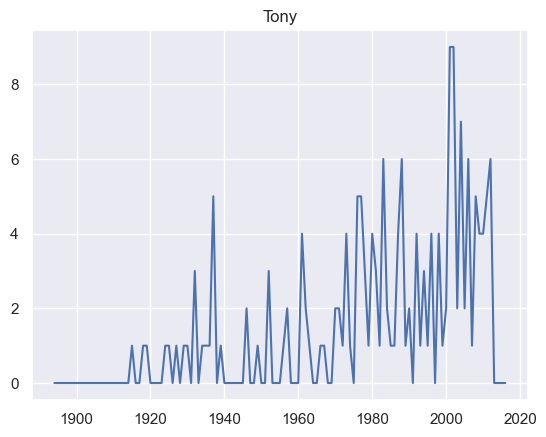

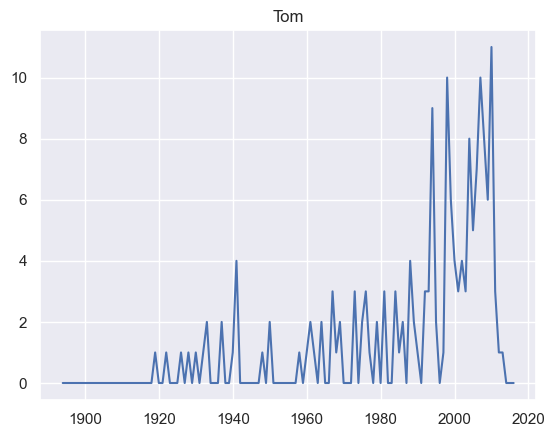

In [69]:
for name in common_names:
    plt.figure()
    sns.lineplot(x=grouped_df.groups.keys(), y=grouped_df.apply(lambda x: x["characters_merged"].apply(lambda y: name in y).sum()))
    plt.title(name)

<AxesSubplot:xlabel='year', ylabel='count'>

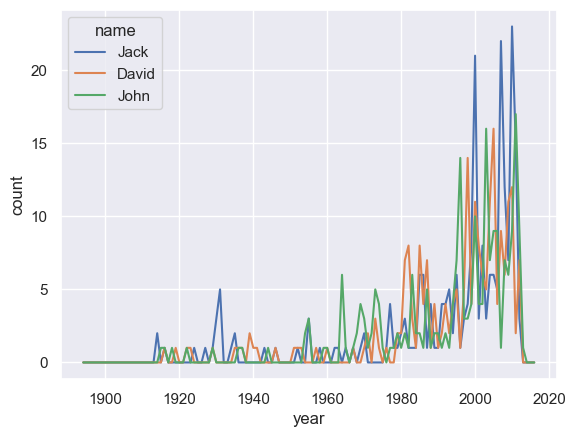

In [67]:
sns.lineplot(x="year", y="count", data=johns_df, hue="name")